In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
df_cns_pre  = pd.read_csv('../../Data/Downloaded/pre_cns.csv')
df_cns_post = pd.read_csv('../../Data/Downloaded/post_real_cns.csv')
df_pi_pre   = pd.read_csv('../../Data/Downloaded/pre_price.csv')
df_pi_post  = pd.read_csv('../../Data/Downloaded/post_price.csv')

In [73]:
linked_ind_1934_to_55_agg = df_pi_pre.iloc[-1]['price_ind_agg']

In [74]:
linked_ind_1934_to_55_cns = df_pi_pre.iloc[-1]['price_ind_consumer']

In [98]:
linked_ind_1934_to_55_cns

315.2

In [150]:
linked_ind_1955_to_90 = 100/df_pi_post.iloc[0]['pi_goods']

In [151]:
linked_ind_1955_to_90

4.366812227074236

In [152]:
linked_ind_1955_to_90_ag = 100/df_pi_post.iloc[0]['pi_ag']

In [153]:
linked_ind_1955_to_90_ag

6.25

In [79]:
df_cns_pre['food_cns_p90_yr'] = df_cns_pre['food_cns_p55'] * linked_ind_1955_to_90

In [103]:
# divide by 12 to get monthly consumption
year_to_mth = 12

In [104]:
df_cns_pre['food_cns_p90_mth'] = df_cns_pre['food_cns_p90_yr'] / year_to_mth

In [156]:
# change the price index for agricultural goods?
linked_ind_1955_to_90_col = [linked_ind_1955_to_90, linked_ind_1955_to_90_ag, linked_ind_1955_to_90]

In [118]:
# create columns to convert prewar variables to 90 monthly variables
col_org = ['tot_cns', 'food_cns', 'non_food_cns']
col_p_55 = ['tot_cns_p55', 'food_cns_p55', 'non_food_cns_p55']
col_p_90_yr = ['tot_cns_p90_yr', 'food_cns_p90_yr', 'non_food_cns_p90_yr']
col_p_90_mth = ['tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']

In [129]:
# below are the steps to create monthly variables at 90 price

In [126]:
for ind, col_title in enumerate(col_org):
    df_cns_pre[col_p_55[ind]] = df_cns_pre[col_title] * linked_ind_1934_to_55_cns

In [130]:
for ind, col_title in enumerate(col_p_55):
    df_cns_pre[col_p_90_yr[ind]] = df_cns_pre[col_title] * linked_ind_1955_to_90

In [131]:
for ind, col_title in enumerate(col_p_90_yr):
    df_cns_pre[col_p_90_mth[ind]] = df_cns_pre[col_title] / year_to_mth

In [105]:
sub_level = 60 * linked_ind_1955_to_90 * linked_ind_1934_to_55_cns / year_to_mth

In [106]:
# subsistence level of consumption 
# 60 yen per year at 1934 to 1936 price
# 5 year per month at 1934 to 1936 price
# 68.8 per month for post war when 1990 price is set to 1
sub_level 

6882.096069868996

In [136]:
# the real consumpiton data sets 1990 price to 100. 
p_1990 = 100

In [137]:
# convert real consumpitons to consumptions in 1990 price
df_cns_post['food_cns_p_90_mth'] = df_cns_post['real_food_cns'] * p_1990

In [140]:
col_post_org = ['real_tot_cns', 'real_food_cns', 'real_non_food_cns']
for ind, col_title in enumerate(col_post_org):
    df_cns_post[col_p_90_mth[ind]] = df_cns_post[col_title] * p_1990

In [141]:
df_cns_post

,year_jpn,year_wst,real_tot_cns,real_food_cns,real_non_food_cns,food_cns_p_90_mth,tot_cns_p90_mth,food_cns_p90_mth,non_food_cns_p90_mth
0,30,1955,219.394991,139.756944,79.638047,13975.694444,21939.499123,13975.694444,7963.804678
1,31,1956,233.581075,146.215604,87.365471,14621.560439,23358.107522,14621.560439,8736.547083
2,32,1957,251.353486,153.192145,98.161341,15319.214500,25135.348631,15319.214500,9816.134131
3,33,1958,280.616571,166.465446,114.151125,16646.544576,28061.657111,16646.544576,11415.112534
4,34,1959,298.044826,169.487592,128.557234,16948.759228,29804.482594,16948.759228,12855.723366
5,35,1960,322.435775,178.231156,144.204619,17823.115607,32243.577507,17823.115607,14420.461900
6,36,1961,350.196193,184.298908,165.897284,18429.890848,35019.619256,18429.890848,16589.728408
7,37,1962,374.407538,186.695944,187.711594,18669.594420,37440.753783,18669.594420,18771.159363
8,38,1963,378.551365,180.203502,198.347863,18020.350196,37855.136529,18020.350196,19834.786333
9,39,1964,405.555209,190.008703,215.546506,19000.870322,40555.520901,19000.870322,21554.650579


In [142]:
df_merged = pd.concat([df_cns_pre[['year_wst', 'tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']],
                      df_cns_post[['year_wst', 'tot_cns_p90_mth', 'food_cns_p90_mth', 'non_food_cns_p90_mth']]])

Text(0.5, 1.0, 'Monthly food consumption per capita at 1990 prices')

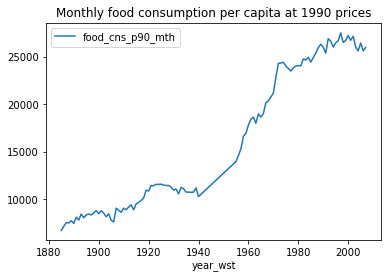

In [148]:
fig, ax = plt.subplots()
df_merged.plot(x = 'year_wst', y = 'food_cns_p90_mth', ax = ax)
plt.title('Monthly food consumption per capita at 1990 prices')